In [1]:
# Import required libraries and dependencies
import pandas as pd

## Need to set local OS environment varialble to avoid known memory leak in Windows with KMeans BEFORE importing KMeans
import os
## set local environment to single-threaded model -- probably reduces performance, but avoids system crash
os.environ["OMP_NUM_THREADS"] = "1"
## continue importing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
## final plot directions say to use hvplot, import it here
import hvplot.pandas

## my environment is set to default plots to matplotlib may work without in other environments
%matplotlib inline

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
## Normalize every column which returns multi-deminsial array
market_data_scaled = StandardScaler().fit_transform(market_data_df[["price_change_percentage_24h",
                                                                    "price_change_percentage_7d",
                                                                    "price_change_percentage_14d",
                                                                    "price_change_percentage_30d",
                                                                    "price_change_percentage_60d",
                                                                    "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"]])

In [5]:
# Create a DataFrame with the scaled data
## place back into DataFrame with same column names
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h",
                                                                  "price_change_percentage_7d",
                                                                  "price_change_percentage_14d",
                                                                  "price_change_percentage_30d",
                                                                  "price_change_percentage_60d",
                                                                  "price_change_percentage_200d",
                                                                  "price_change_percentage_1y"])

# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index("coin_id")

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Define functions to reuse code based on Don't Repeart Yourself (DRY) principles

In [6]:
def get_inertia(df, k_range_start, k_range_end):
    """
    Finds inertia values of K-Means for a scaled DataFrame.
    
    Accepts: DataFrame as df
             Start and End values as range() -- meaning exclusive end value
             
    Returns: DataFrame of k values and associated inertia 
    """
    ## create list of k values to try range of start and end (1 step)
    k_list = list(range(k_range_start, k_range_end, 1))
    ## create emply list to store inertia values
    inertia_list = []
    ## iterate throug k_list finding and appending inertia
    for k in k_list:
        ## model K-Means based on k clusters -- random state as 1 ensures consistent output for this demonstration
        k_model = KMeans(n_clusters=k, n_init="auto", random_state=1)
        ## fit model to data
        k_model.fit(df)
        ## append inertia value to list
        inertia_list.append(k_model.inertia_)

    ## Create dictionary of k and inertia values
    inertia_dict = {"k" : k_list,
                    "inertia" : inertia_list}
    ## Create DataFrame of k and inertia
    inertia_df = pd.DataFrame(inertia_dict)
    return inertia_df

In [7]:
def get_best_k(inertia_df):
    """
    Finds the best K-Means (k) value based on inertia values in a DataFrame

    Best k value is determined as the point before the percent change 
    of inertia values which drops below the mean of all inertia value
    percent changes, and has already dropped below 1/3 the total.
    
    My logic: if the elbow method is looking for the point at which
    the line graph begins to level out, such leveling could be seen by
    finding the slope of the line (calculated by percent change) such
    that the slope of a single segment is less than the average slopes
    of all segements, with the added presumption no true leveling will
    occur before at least at 67% drop from the total (at or below 33%).

    Accepts: Dataframe of "k" and "intertia" values columns

    Returns: best k as int
    """
    ## calculate percent change of inertia rows positive values as percent
    inertia_df["percent_change"] = abs(inertia_df["inertia"].pct_change() * 100)
    ## store top inertia value for later comparison before dropping that row
    top_inertia = inertia_df["inertia"].iloc[0]
    ## drop the first row with NaN percent change value (k will never be 1)
    inertia_df = inertia_df.dropna()
    ## Calculate average (statistical mean) of percent changes
    avg_pct_change = inertia_df["percent_change"].mean()
    ## create iterable list of percent change
    pct_change_list = inertia_df["percent_change"].to_list()
    ## iterate through inertia percent change values find the value which drops below the mean
    ##    note that the index of the list is now one behind the k value 
    ##    as we removed k = 1 row, and then reset values as a 0 based index list
    for idx in range(len(pct_change_list)):
        if (pct_change_list[idx] < avg_pct_change) and (inertia_df["inertia"].iloc[idx] <= top_inertia * 0.33):
            return idx + 1

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
## V See defined function to achieve below V ##
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
## Complete all the above steps with a single function
market_data_inertia_df = get_inertia(market_data_scaled_df, 1, 11)

# Display the DataFrame
market_data_inertia_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Best k by Elbow Curve Method'}, xlabel='k'>

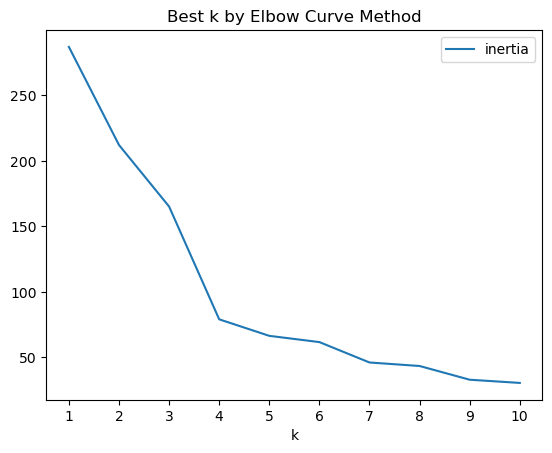

In [9]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
market_data_inertia_df.plot.line(x="k",
                                 y="inertia",
                                 title="Best k by Elbow Curve Method",
                                 xticks=list(range(1, 11)))

In [10]:
## Use defined function to find mathematical "best k"
market_data_best_k = get_best_k(market_data_inertia_df)
## Print mathematical best k
print(f"The calculated best K-Means number of clusters is {market_data_best_k}")

The calculated best K-Means number of clusters is 4


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The visual best value for `k` is **4**, the calculated value for `k` is also **4**.*

\* I note that different versions of scikit-learn yield different inertia points even with the random_state set to 1.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
## hard code best k in case of a mismatch, but could have used calculated variable
## also setting random_state to 1 for consistency of output
market_model = KMeans(n_clusters=4, n_init="auto", random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
market_model.fit(market_data_scaled_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_clusters = market_model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
market_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [14]:
# Create a copy of the DataFrame
market_data_clusters_df = market_data_scaled_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
market_data_clusters_df["crypto_cluster"] = market_clusters

# Display sample data
market_data_clusters_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

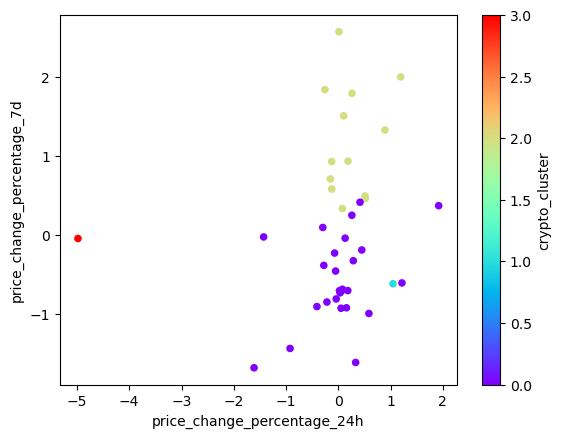

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_clusters_df.plot.scatter(x="price_change_percentage_24h",
                                     y="price_change_percentage_7d",
                                     c="crypto_cluster",
                                     colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca_model.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
## you mean the first five rows of the multi-dimensional array?
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [19]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca_model.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The first three principal components account for nearly 90% of the variance of the original data.

In [20]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
## note the note, I don't see any code for this step so making my own
# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(market_data_pca, columns=["PCA1", "PCA2", "PCA3"])

# Copy the crypto names from the original data
market_data_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index("coin_id")

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [21]:
## V See defined function to achieve below V ##
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
## Complete all the above steps with a single function
market_data_pca_inertia_df = get_inertia(market_data_pca_df, 1, 11)

# Display the DataFrame
market_data_pca_inertia_df

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Best k by Elbow Curve Method'}, xlabel='k'>

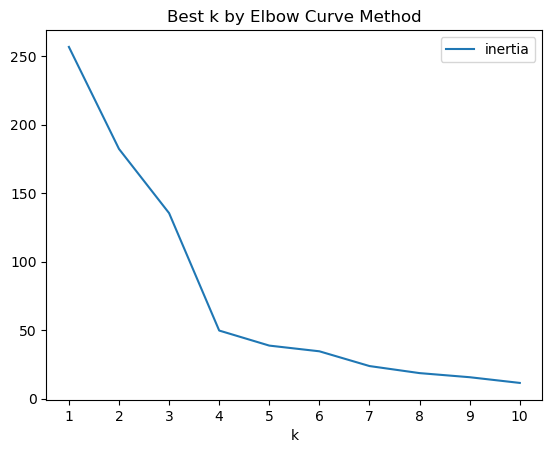

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
market_data_pca_inertia_df.plot.line(x="k",
                                     y="inertia",
                                     title="Best k by Elbow Curve Method",
                                     xticks=list(range(1, 11)))

In [23]:
## Use defined function to find mathematical "best k"
market_data_pca_best_k = get_best_k(market_data_pca_inertia_df)
## Print mathematical best k
print(f"The calculated best K-Means number of clusters is {market_data_pca_best_k}")

The calculated best K-Means number of clusters is 4


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The visual best `k` is **4**, and the calculated best `k` is also **4**.*

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** In this case the visual line appears very similar in both sets of data, and the same best `k` makes sense. I don't know if that would hold true for all data sets or not as the underlying math of finding the PCA was not directly covered in class.

\* Of course one would want to test my automated logic against many different data sets and compare with visual analysis before stating the logic is sound. But, at least for this demonstration, it appears sound.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [24]:
# Initialize the K-Means model using the best value for k
## I did not put this and the next three cells into a defined function
##   as we want to see some output even though this is a repeat from above
market_pca_model = KMeans(n_clusters=4, n_init="auto", random_state=1)

In [25]:
# Fit the K-Means model using the PCA data
market_pca_model.fit(market_data_pca_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [26]:
# Predict the clusters to group the cryptocurrencies using the PCA data
market_pca_clusters = market_pca_model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
market_pca_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [27]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_clusters_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_clusters_df["crypto_cluster"] = market_pca_clusters

# Display sample data
market_data_pca_clusters_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [28]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
## I note that the instructions above asked for an hvPlot (though in the bootcampspot says use pandas plot)
##   and instead of using the "winter" colormap as the original starter code, using "rainbow" to compare with above
market_data_pca_clusters_df.hvplot(x="PCA1", y="PCA2", 
                                   kind='scatter',
                                   c="crypto_cluster",
                                   colormap="rainbow")

:Scatter   [PCA1]   (PCA2,crypto_cluster)

#### While not included in original starter code, answering the question posed here in the instructions: 
* **Question:** What is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The two outlier clusters both of which are single data points are easier to see along the new X-axis, whereas in the previous plot one of the outliers appeard near the other clusters. In this case using PCA can help find outliers. Though it may be helpful for other things.

### Determine the Weights of Each Feature on each Principal Component

In [29]:
# Use the columns from the original scaled DataFrame as the index.
market_data_weights = pd.DataFrame(pca_model.components_.T, columns=["PCA1", "PCA2", "PCA3"], index=market_data_scaled_df.columns)
market_data_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**
    * For PCA 1 the strongest positive influences were the 200 day and 1 year price changes, whereas the strogest negative influence was the 24 hour price change.
    * For PCA 2 the strongest positive influences were the 30 day and 14 day price changes, whereas the only negative influence (1 year) was rather weak.
    * For PCA 3 the strongest positive influence was the 7 day price change with a mediocre negative influence on the 60 day price change.
    